# Unit 2 Assessment - Monte Carlo Simulations

## Instructions

In this assessment, you are going to investigate models that use random numbers. 

Scores are determined by:

- Successfully starting the C Level = 50 pts
- Perfectly completing the C Level = 75 pts
- Perfectly completing the B and C Levels = 85 pts
- Perfectly completing the A, B, and C Levels = 100 pts

You may ask me for help **once**; however, you may ask for clarification as often as needed.

Add additional cells for both code and markdown as needed. **Write answers to questions in narrative form in markdown.** You may print values you need in your code, and then use these values in a written response.

All graphs should have correct titles and axis labels (with units).

### **Using resources**

You may use your Colab notebooks from class, any other notebook or reading I have given you, and any links to web sites I have provided. Basically, if it is linked on Blackboard then you can use it.

You may not use any other person, website, book, or resource. This includes the AI features in Google Colab or any other generative AI tool (ChatGPT, etc.) You are responsible for using only approved resources. If you're unsure whether something is allowed, please ask me before using it.

You can disable the Gemini AI assistance by going to settings and unchecking `Consented to use generative AI features` and checking `Hide generative AI features.` as seen below.


### **Citing Sources**

Citing sources isn't just about copying and pasting code—it's about giving credit whenever you use ideas, inspiration, or guidance from another source, even if you don't copy directly. Here's how to handle it:

- **When to Cite**:
  - If you refer to a **specific code example** from class materials, notebooks, or a reading.
    - Example: "I used the loop structure from the `02-01-random` notebook, exercise 1."
  - When you use an **idea** or approach that you didn't come up with on your own, even if you modify it.
    - Example: "The way I calculated the probability of finding the area of a circle was based on the pre-class notebook for Day 3."
  - **Even if you don't copy-paste** code, if something influenced your thinking or the way you structured your solution, it should be cited.
  
- **What doesn't need citation**:
  - Basic ideas that come entirely from your own brain.
  - Simple language constructs like loops, if-statements, or variables, unless they come directly from an example you're referencing.

- **Key points**
  - It's always better to cite than to leave something out. You won't lose points for over-citing and I will give you feedback on what citations are required or not.
  - Don't just cite when you copy code—cite when ideas or problem-solving approaches come from an outside source.

- **Examples of Correct Citations**:
  - **Copied/Modified Code**: "We used the code from the `randomwalk1D` function in the `02-03-random-walk` notebook to help structure our loop."
  - **Concept or Inspiration**: "We based our approach for determining the circle a dart landed in on the exmaple we did in class estimating $\pi$. "

## Grade

<font color="green"></font>

Level | Grade | Comment
--- | --- | ---
C (75 pts) | | 
B (10 pts) | | 
A (15 pts) | | 
Total | 


# Level C

## Exercise 0

1. Save a copy of this notebook to Google Drive. Have you already shared your Google Colabortory folder with "hpuphysicsdepartment@gmail.com"? If not, then be sure to share your folder.

2. Add a text cell above and type your name as a level one heading in markdown. (A level one heading starts with # on its own line.)

3. Run the `import` statements below to add packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import MaxNLocator
import random as rand

## Exercise 1

Print a random number (float) in the interval $[0,1)$.

In [2]:
num = rand.random()
print(num)

0.7417722603981288


## Exercise 2

Print a random number (float) in the interval $[1,6]$.

In [3]:
num = rand.uniform(1,6)
print(num)

3.7137040616443944


## Exercise 3

Print a random integer in the interval $[1,6]$. 

In [4]:
num = rand.randint(1,6)
print(num)

6


## Exercise 4
What is the relationship between randomness and Monte Carlo simulations? How can we get a meaningful answer to a question from a random process?

Monte Carlo models are used to model random processes. Often, a process is to complicated to describe directly with a model, but we can describe the probabilities of individual outcomes. In these situations, we can run out model a large number of times and look at statistical averages of the outcomes. It allows us to calculate both the expected outcomes as well the variation in the expected outcomes. This is often enough to answer the question we are asking of the model.  

## Exercise 5

So far we have mostly considered 6-sided dice. Suppose instead you have a fair four sided die so you have an equal probability of getting a 1, 2, 3, or 4 whenever you roll the die. How would such a die be shaped? You do not have to give me the formal name, just describe it.


This would be a pyramid shape. It's official name is a tetrahedron.

## Exercise 6

Write a brief program to roll a four sided die 100 times and count the number of times you roll a three. How many times do you roll a three?

In [5]:
N = 100
N3 = 0
for i in range(N):
    num = rand.randint(1,4)
    if num == 3:
        N3 += 1
print(N3)

25


Using a four sided die, we rolled a three 25 times.

## Exercise 7

Copy your code from Exercise 6 and modify it to calculate the probability of rolling a three. What is the probability of rolling a three according to your model?

In [6]:
N = 100
N3 = 0
for i in range(N):
    num = rand.randint(1,4)
    if num == 3:
        N3 += 1
print(N3/N)

0.23


According to our model, the probability of rolling a three is 23%.

## Exercise 8

Consider your model from exercise 7. **What change would you need to make to the model to increase the accuracy of your estimation?** Copy your code below and make whatever modifications are necessary to the model to increase the accuracy of your estimation for the probability of rolling a three and then **compare your new estimate to the true probability of rolling a three**.

To increase the accuracy of the model, we should simulate the rolling of many more die. To do that we simply have to increase the value of `N`. Our new predicted probability running the model 10,000 times is 25.34%. The true probability is 25% so we are only off by 0.34%.

In [7]:
N = 10000
N3 = 0
for i in range(N):
    num = rand.randint(1,4)
    if num == 3:
        N3 += 1
print(N3/N)

0.2534


---
# Level B


[Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) was first described by the botanist Robert Brown in the 1820s. He observed that a piece of pollen sitting in some water would "jitter" around in a seamingly random way. Almost all small particles  in a liquid (think molecules and enzymes in cells) exibit similar behavior. There are some good visualizations of the process in the linked Wikipedia page. The physics of this process was described by Albert Einstein in 1905 in one of his first major scientific contributions. Einstein proposed that the motion of the pollen observed was due to many collisions with individual water molecules.

Obviously we cannot simulate individual water at any large scale (in a teaspoon of water there are more than $10^{23}$ water molecules!). But we can still model the motion as a random walk. 

## The model
In our model, we will track the 2D position of the piece of pollen observed by Robert Brown. At the start of the walk, the pollen is located at the origin $(x,y) = (0,0)$. At each timestep, the pollen will move in a random direction by 1 mm. We will run the model for 10 stages (that is, 10 timesteps) and record the final position of the pollen.

I have written most of the model for you below. Run the code. The output is a plot showing where each piece of pollen ended up at the end of the 10 stages. Look at the output and make sure you understand what it is showing. Then read over the code and answer the questions below.

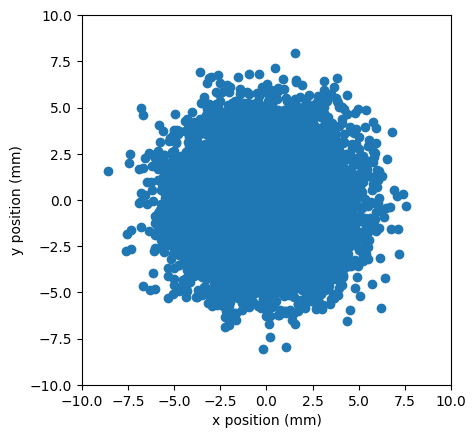

The average x position is -0.06 mm
The average y position is -0.05 mm
The average distance between the start and end points is 2.82 mm


In [24]:
NPollen = 10000 #Number of pieces of pollen to simulate 
L = 1 # Distance of a step in mm
NStages = 10 # Number times the particle moves

final_pos_x = [] # Final x position of the pollen
final_pos_y = [] # Final y position of the pollen

# Define a function that simulated a random walk in 2D
# returns the final position of the particle
def randomWalk2D():
    global NStages
    x = 0
    y = 0
    for i in range(NStages):
        dir = rand.uniform(0,2*np.pi) # Random angle between 0 and 2pi (direction)
        
        #Calculate the new position of the particle
        x = x + L*np.cos(dir)
        y = y + L*np.sin(dir)
    
    #Return the final position of the particle
    return x,y


for i in range(NPollen):
    pollen_x, pollen_y = randomWalk2D()
    
    final_pos_x.append(pollen_x)
    final_pos_y.append(pollen_y)

# Plot the final locations of the pollen
plt.xlim(-L*NStages,L*NStages)
plt.ylim(-L*NStages,L*NStages)
plt.axis('square')
plt.plot(final_pos_x,final_pos_y,'o')
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.show()

# Calculate the average x and y position of the pollen
avg_x = 0
avg_y = 0
avg_r = 0
for i in range(NPollen):
    avg_x += final_pos_x[i]
    avg_y += final_pos_y[i]
    avg_r += np.sqrt(final_pos_x[i]**2 + final_pos_y[i]**2)
avg_x = avg_x/NPollen
avg_y = avg_y/NPollen
avg_r = avg_r/NPollen

print(f"The average x position is {avg_x:.2f} mm")
print(f"The average y position is {avg_y:.2f} mm")
print(f"The average distance between the start and end points is {avg_r:.2f} mm")

## Exercise 1

After reading the code, answer the following questions (remember to answer in **full sentences**):

(a) How many pieces of pollen are we simulating? What is the name of the variable that represents the number of pieces of pollen that we are simulating?

(b) How many steps does each piece of pollen take in the model? What variable represents this?

(b) How far does the piece of pollen move each time step (or stage)? What variable represents this?

(d) What line of code determines the direction the pollen moves each timestep? Explain what that line of code is doing.

(e) We are storing the final x and y positions of each piece of pollen. What are the names of the variables that represent the lists of the final x and y positions of each piece of pollen?


(a) We are simulating 100 pieces of pollen. The variable that represents this is `NPollen`.

(b) We are simulating 10 steps (or stages). The variable that represents this is `NStages`.

(c) The pollen moves 1 mm in each timestep. The variable that represents this is `L`.

(d) The line of code that determines the direction is `dir = rand.uniform(0,2*np.pi)`. It generates a random number between 0 and $2\pi$. This number corresponds to the direction that the pollen moves in. 

(e) The two lists that correspond to the final x and y positions of the pollen are `final_pos_x` and `final_pos_y`, respectively.

## Excercise 2

Add code at the end of the model above to calculate and print the average x-position and average y-position of each piece of pollen. Note: This is two different averages, one for the x-position and a second for the y-positions.

Report on your answers for the average final positions. How much do your answers vary each time you run the model?

After a run of the model with 100 pieces of pollen, our average final x and y positions were -0.06 and 0.30 mm, respectively. Each time we ran the model the answers were between $\pm 30$ mm for both coordinates.




## Exercise 3

Modify the model to reduce that variation and calculate the **expected** average x-position and average y-position. 

Report on your answers for the average final positions and how you modified the model. How much does it vary each time you run the model now? 

To reduce the variation we should increase the number of pieces of pollen we are simulating. We increased it to 10,000 pieces. After running the model once, the average x position is 0.04 mm and the average y position is 0.01 mm. Running the model multiple times, the variation seems to be about $\pm 0.03$ mm.



## Exercise 4

Instead of calculating the average final x and y positions of the pollen, let's calculate the average distance between where the pollen ends up and its initial starting position. If we call that distance $r$, then we can calculate it as

$ r = \sqrt{x^2 + y^2} $.

Modify your model to also calculate the average distance between where the pollen ends up and its initial starting position. What is that average distance?

The average distance between the start and end points is 2.83 mm.


## Exercise 5

Compare the averages you obtained for the final x/y positions of the pollen and distance from the starting point to the pollen's final position? Are they in agreement with each other? How can we reconcile these two pieces of information together?

Our final exected x and y positions were both 0 mm (with some variation around that point). The distance was non-zero, somewhere around 2.8 mm. This difference arrises from the fact that the x and y positions care about which direction the pollen traveled, on average. While the distance just cares about how far the pollen traveled. This can be seen in the plot as well. The final locations of the pollen are like a circle, centered around (0,0) but they are mostly located at a non-zero radius, so we would expect r to be a non-zero number.

# Level A



In class, we discussed one way to estimate $\pi$. In that example we threw darts at a board and found how many of them landed within some circle. 

It turns out, there are a large number of ways to estimate $\pi$ using randomness. One of the more famous is a method [Buffon's Needle](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem). It's based on a question asked by 18th century Frenchman [Georges-Louis Leclerc, Comte de Buffon](https://en.wikipedia.org/wiki/Georges-Louis_Leclerc,_Comte_de_Buffon):

"Suppose we have a floor made of parallel strips of wood, each the same width, and we drop a needle onto the floor. What is the probability that the needle will lie across a line between two strips?"

This question is illustrated in the figure below (it might hard to see dark mode, it's transparent and black). 

![Image depicting Buffon's Needle problem](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Buffon_needle.svg/1920px-Buffon_needle.svg.png)


As indicated by the figure, the answer to Buffon's question relies on two inputs: the length of the needle, $l$, and the width of the strips, $t$. As it turns out, the probability a needle crosses two strips, $p$ is given by:

$$p = \frac{2}{\pi}\frac{l}{t} $$

By estimating the probability a needle intersects two strips using a monte-carlo simulation, we can use the  expression above to estimate the value of $\pi$.

I have written most of the model to estimate the probability for you below. Read through the code to understand what it is doing and then run the model. You should see a single need being placed on the board that is perfectly horizontal. 

The divisions are at [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
The number of needles that intersect two strips is 3199
The probability of a needle intersecting two strips is 0.3199
The theroretical probability of a needle intersecting two strips is 0.3183098861837907
The experimental value of pi is 3.1259768677711786


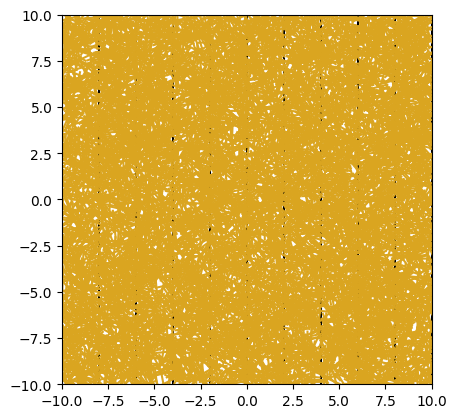

In [38]:
# A function to draw a needle onto the board
# You will not need to modify this at all
def drawNeedle(xpos, ypos, angle):
    dx = l/2 * np.cos(angle) # Get the min x coordinate
    dy = l/2 * np.sin(angle) # Get the max x coordinate
    px = [x+dx, x-dx] # Create a list for plotting
    py = [y+dy, y-dy] # Create a list for plotting
    
    plt.plot(px,py,'-',color='goldenrod')
    
N = 10000 # Number of needles thrown
Nint = 0 # Number of needles that intersect two boundries
l = 1 # Length of a needle
t = 2 # width of the strips
Nstrips = 10 # Number of strips

# Create a list of x-positions for the divisions between strips
L = Nstrips*t # Length of the board
divisions =  np.arange(-L/2, L/2+.00001,t) 
print(f"The divisions are at {divisions}")

# Draw the board and divisions (we do this once before we draw any needles so the needles are on top)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2) 
plt.axis('square')
for div in divisions:
    plt.plot([div,div],[-L/2,L/2],color='black')
    

### Begin Monte Carlo now that everything is setup
for i in range(N):
    #####
    # Add code to randomize the position and angle of the needle
    x = rand.uniform(-L/2, L/2) # x position of the needle
    y = rand.uniform(-L/2, L/2) # y position of the needle
    angle = rand.uniform(0, 2*np.pi) # Angle of the needle with respect to the x-axis in radians
    #####
    
    # Draw the needle on the board. Comment this out when running with a large number of needles
    drawNeedle(x,y,angle) 
    
    # Calculate the min and max x positions of the needle
    xmin = x - l/2 * np.abs(np.cos(angle)) # This is the smallest x value covered by the needle
    xmax = x + l/2 * np.abs(np.cos(angle)) # This is the largest x value covered by the needle
    
    # Check if the needle crosses any divisions
    for div in divisions:
        #####
        # Add code to check if the needle crosses a division
        # that is, check if div is between xmin and xmax
        if xmin <= div and div <= xmax:
        #####
            # If the needle crosses a division, increment Nint and break the loop
            Nint += 1
            break
        

print(f"The number of needles that intersect two strips is {Nint}")
print(f"The probability of a needle intersecting two strips is {Nint/N}")
print(f"The theroretical probability of a needle intersecting two strips is {2/(np.pi)*l/t}")
print(f"The experimental value of pi is {2*l*N/(t*Nint)}")
plt.show() 
    
    

# Exercise 1

You will need to add in a few key lines of code to complete the model. Those lines are marked with comments that look like this
```python
#####
# Instructions for what to do.
#####
```

To start, let's get the needles to land all across the board and at different angles. Find the lines of code that correspond to the location of the needle being generated and the angle the needle makes with respect to the x-axis. Rather than setting those all to zero, replace those lines with code that will randomly select the position and angle. The angle must be in radians (recall, $360^\circ = 2\pi$ radians) and the needles should be randomly spread across the entire board with a uniform distribution. (*Hint*: How did you tackle this in your dart-throwing examples?)

Verify your code works by running it multiple times and looking at the board. Are the needles evenly distributed? Are they at all different angles?

# Exercise 2

If you look at the output, you'll notice it always says there are no needles crossing two strips, but that is clearly wrong.

Find the lines of code that are checking if the needle crosses two strips and fix it so it is properly counting the events of intrest. The divisions between strips are all listed in the list `divisions` and so all we need to check is if a single division sits in between `xmin` and `xmax`. (*Hint*: This is a change to a single line of code in the model above.)

Verify your code is working by running it with a small $N$ a few times and checking by eye if it is properly counting when needles cross divisions.

# Exercise 3

Now that you have a fully working Monte Carlo model: What is your estimate for the probability that a needle crosses two strips? Make sure you have modified the model to make an **accurate** estimation of the probability (remember to comment out the line drawing the needles when using a large number of needles)! Compare that to the theoretical probability given by the expression $$p = \frac{2}{\pi}\frac{l}{t}$$

Using 10,000 needles, our estimate for the probability a needle crosses two boundries is 0.313. The theoretical probability is 0.318 which is close.

# Exercise 4

On a piece of paper (you do not have to hand this in) re-arrange the above expression for the probability to come up with an expression for $\pi$. That is, find $$\pi = ...$$

Our expression is $$\pi = \frac{2}{p}\frac{l}{t}$$

# Exercise 5

At the end of your model above, calculate and print out your estimate for $\pi$. What is your numeric estimate for $\pi$? How does it compare to the true value?

Our estimate for pi using 10,000 needles was 3.13. The true value of pi is 3.14159 which is close (we could increase the accuracy by increasing the number of needles thrown.)

# Exercise 6

Quantify the uncertainty in your estimation for $\pi$. Copy your working model below, and use it to estimate the **standard deviation** of your estimation for $\pi$. To do this, you will need to run the full simulation multiple times to get many "measurements". 

What is the standard deviation of your estimate for $\pi$? 

**Hint**: If I were you, I would write out your plan for how to tackle this problem before starting. Then once you have a plan, begin modifying your code. I would also remove all of the visualization components (no drawing of the board or needles) to simplify things.

To estimate the standard deviation we will need many measurements. To do this we need to run the full model many times. In this case, I will move the model into a function called `simulatePi()` which will return our estimate for pi.

Then I will run the simulation a 100 times, recording each estimate for pi I get. Using those estimates I will calculate the average estimate for pi and then the standard deviation using the expression for the standard deviation from our `02-04-LLN-reading` notebook.

Using 10,000 needles, our standard deviation was 0.049. 

In [48]:
def estimatePi():   
    N = 10000 # Number of needles thrown
    Nint = 0 # Number of needles that intersect two boundries
    l = 1 # Length of a needle
    t = 2 # width of the strips
    Nstrips = 10 # Number of strips

    # Create a list of x-positions for the divisions between strips
    L = Nstrips*t # Length of the board
    divisions =  np.arange(-L/2, L/2+.00001,t) 

    ### Begin Monte Carlo now that everything is setup
    for i in range(N):
        #####
        # Add code to randomize the position and angle of the needle
        x = rand.uniform(-L/2, L/2) # x position of the needle
        y = rand.uniform(-L/2, L/2) # y position of the needle
        angle = rand.uniform(0, 2*np.pi) # Angle of the needle with respect to the x-axis in radians
        #####
        
        # Calculate the min and max x positions of the needle
        xmin = x - l/2 * np.abs(np.cos(angle)) # This is the smallest x value covered by the needle
        xmax = x + l/2 * np.abs(np.cos(angle)) # This is the largest x value covered by the needle
        
        # Check if the needle crosses any divisions
        for div in divisions:
            #####
            # Add code to check if the needle crosses a division
            # that is, check if div is between xmin and xmax
            if xmin <= div and div <= xmax:
            #####
                # If the needle crosses a division, increment Nint and break the loop
                Nint += 1
                break
            

    pi = 2*l*N/(t*Nint)
    return pi

Nest = 100
measurements = []
for i  in range(Nest):
    measurements.append(estimatePi())

avg = 0
for i in range(Nest):
    avg += measurements[i]
avg = avg/Nest

print(f"The average value of pi is {avg:.4f}")
stdDev = 0
for i in range(Nest):
    stdDev += (measurements[i] - avg)**2
stdDev = np.sqrt(stdDev/(Nest))

print(f"The standard deviation of the estimate of pi is {stdDev:.4f}")

The average value of pi is 3.1404
The standard deviation of the estimate of pi is 0.0453
